<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 0041-83493_Rev07.csv to 0041-83493_Rev07 (1).csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['0041-83493_Rev07.csv']))

In [ ]:
dataset

,SN (JOB #),SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220,SH1_B5_Diameter -0.160,SH1_B5_Position -0.005,SH1_B1_Width -0.190,SH1_B1_Distance -0.200,SH1_B1_Position- 0.002,SH1_D5_Position -0.005,SH2_D7_Width -0.190,...,SH4_B7_Width -0.065,SH3_B8_Position -0.005,SH3_B7_Distance -0.100,SH4_C7_Radius -0.0325,SH4_D8_Distance -0.470,SH4_D8_Distance -0.235,SH4_B7_Distance -0.148,SH4_C7_Distance -0.118,SH2_B8_Angle -5 Deg,SH2_C7_Distance -6.000_R
0,IPI-001_SN0001 (CP467059),14.017400,0.222300,0.161250,0.000700,0.192200,0.198800,0.000000,0.001100,0.192200,...,0.068400,0.001200,0.098950,0.033800,0.473750,0.236300,0.147450,0.117250,5.040300,6.000200
1,0 DEG SN 0002 (CP471589),14.016011,0.221733,0.161174,0.000481,0.191812,0.200574,0.000000,0.001154,0.191750,...,0.067757,0.002455,0.102773,0.033507,0.470759,0.234603,0.147419,0.117412,5.056671,6.000013
2,90 DEG SN 0003 (CP471589),14.015942,0.221904,0.161202,0.000903,0.191788,0.200091,0.000000,0.001015,0.191730,...,0.067760,0.001692,0.102942,0.033518,0.470711,0.234614,0.147386,0.117469,5.050116,5.999963
3,180 DEG SN 0004 (CP471589),14.018477,0.221841,0.161174,0.000434,0.191770,0.200465,0.000000,0.001113,0.191971,...,0.067707,0.002165,0.102567,0.033509,0.470742,0.234636,0.147522,0.117474,5.050046,6.000079
4,SN0005 270DEG (CP471589),14.016071,0.221928,0.161158,0.000481,0.191820,0.200294,0.000000,0.000876,0.191710,...,0.067761,0.001043,0.102188,0.033508,0.470712,0.234519,0.147350,0.117411,5.045632,5.999966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,SN 301514-5021-0256 (CP474149_REV08),14.015503,0.221326,0.160738,0.000396,0.191336,0.200956,0.000008,0.001500,0.191257,...,0.067776,0.000313,0.098899,0.033551,0.472191,0.236373,0.148387,0.118398,5.046470,5.998720
88,SN 301514-5021-0257 (CP474149_REV08),14.015220,0.221238,0.160695,0.001317,0.191349,0.200278,0.000000,0.001034,0.191284,...,0.067780,0.001097,0.098601,0.033503,0.472068,0.236322,0.148331,0.118553,5.044330,6.000287
89,SN 301514-5021-0258 (CP474149_REV08),14.015178,0.221296,0.160680,0.000526,0.191342,0.200183,0.000000,0.000821,0.191169,...,0.067780,0.000545,0.098496,0.033497,0.471922,0.236317,0.148301,0.118640,5.044763,6.000126
90,SN 301514-5021-0259 (CP474149_REV08),14.017048,0.221358,0.160751,0.000183,0.191340,0.200260,0.000000,0.000817,0.191211,...,0.067777,0.000742,0.098684,0.033505,0.471981,0.236307,0.148213,0.118508,5.046067,6.000382


In [ ]:
X = dataset.iloc[:, [1,2]].values

In [ ]:
print(X)

[[14.0174    0.2223  ]
 [14.016011  0.221733]
 [14.015942  0.221904]
 [14.018477  0.221841]
 [14.016071  0.221928]
 [14.016715  0.221905]
 [14.01652   0.22193 ]
 [14.017058  0.221886]
 [14.017333  0.221834]
 [14.016382  0.221859]
 [14.01643   0.221896]
 [14.015969  0.221888]
 [14.015904  0.221868]
 [14.01671   0.221922]
 [14.017094  0.221913]
 [14.015875  0.221904]
 [14.015689  0.22191 ]
 [14.016832  0.221927]
 [14.016755  0.221912]
 [14.016367  0.221875]
 [14.018125  0.221926]
 [14.017755  0.221921]
 [14.017335  0.221925]
 [14.017093  0.221907]
 [14.016819  0.221931]
 [14.017705  0.221942]
 [14.016766  0.221939]
 [14.017205  0.221934]
 [14.015922  0.221921]
 [14.016522  0.221908]
 [14.016131  0.221921]
 [14.016922  0.221917]
 [14.01698   0.221916]
 [14.018163  0.221931]
 [14.017214  0.221908]
 [14.016993  0.221913]
 [14.016838  0.221909]
 [14.017674  0.221911]
 [14.016728  0.221887]
 [14.016791  0.221913]
 [14.01673   0.22191 ]
 [14.017064  0.221908]
 [14.016716  0.221939]
 [14.017294

In [ ]:
dataset.shape

(92, 129)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 129 entries, SN (JOB #) to SH2_C7_Distance -6.000_R
dtypes: float64(127), int64(1), object(1)
memory usage: 92.8+ KB


# Taking care of missing data

Impute Missing Values.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [ ]:
print(X)

[[14.0174    0.2223  ]
 [14.016011  0.221733]
 [14.015942  0.221904]
 [14.018477  0.221841]
 [14.016071  0.221928]
 [14.016715  0.221905]
 [14.01652   0.22193 ]
 [14.017058  0.221886]
 [14.017333  0.221834]
 [14.016382  0.221859]
 [14.01643   0.221896]
 [14.015969  0.221888]
 [14.015904  0.221868]
 [14.01671   0.221922]
 [14.017094  0.221913]
 [14.015875  0.221904]
 [14.015689  0.22191 ]
 [14.016832  0.221927]
 [14.016755  0.221912]
 [14.016367  0.221875]
 [14.018125  0.221926]
 [14.017755  0.221921]
 [14.017335  0.221925]
 [14.017093  0.221907]
 [14.016819  0.221931]
 [14.017705  0.221942]
 [14.016766  0.221939]
 [14.017205  0.221934]
 [14.015922  0.221921]
 [14.016522  0.221908]
 [14.016131  0.221921]
 [14.016922  0.221917]
 [14.01698   0.221916]
 [14.018163  0.221931]
 [14.017214  0.221908]
 [14.016993  0.221913]
 [14.016838  0.221909]
 [14.017674  0.221911]
 [14.016728  0.221887]
 [14.016791  0.221913]
 [14.01673   0.22191 ]
 [14.017064  0.221908]
 [14.016716  0.221939]
 [14.017294

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, :] = sc.fit_transform(X[:, :])

## Using the elbow method to find the optimal number of clusters

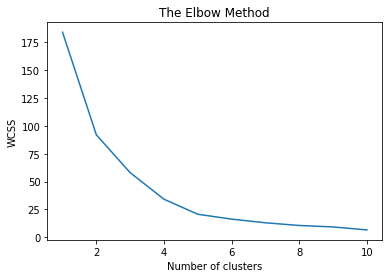

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[0 4 4 3 4 0 4 0 0 4 4 4 4 0 0 4 4 0 0 4 3 3 0 0 0 3 0 0 4 4 4 0 0 3 0 0 0
 3 0 0 0 0 0 0 4 0 0 0 0 4 0 4 0 4 0 3 4 0 0 0 3 0 4 0 3 3 0 4 3 0 2 1 2 1
 2 2 1 2 2 1 2 1 1 2 1 2 1 1 1 1 2 2]


## Visualising the clusters

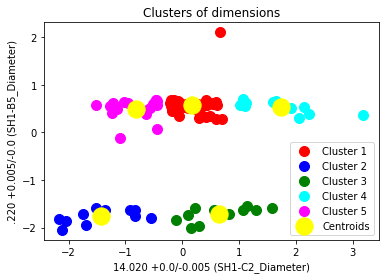

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of dimensions')
plt.xlabel('14.020 +0.0/-0.005 (SH1-C2_Diameter)')
plt.ylabel('.220 +0.005/-0.0 (SH1-B5_Diameter)')
plt.legend()
plt.show()